In [1]:
library(tidyverse)

Warning message:
“Installed Rcpp (0.12.14) different from Rcpp used to build dplyr (0.12.13).
Please reinstall dplyr to avoid random crashes or undefined behavior.”Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [21]:
data_path <- '../data/'
df <- read_csv(paste0(data_path, 'predicted_Q_physician_df_val.csv'))

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_integer(),
  subject_id = col_integer(),
  hadm_id = col_integer(),
  icustay_id = col_integer(),
  interval_start_time = col_datetime(format = ""),
  interval_end_time = col_datetime(format = ""),
  discrete_action = col_integer(),
  hospital_expire_flag = col_integer(),
  reward = col_integer()
)
See spec(...) for full column specifications.


Warning message:
“Removed 7 rows containing missing values (geom_path).”

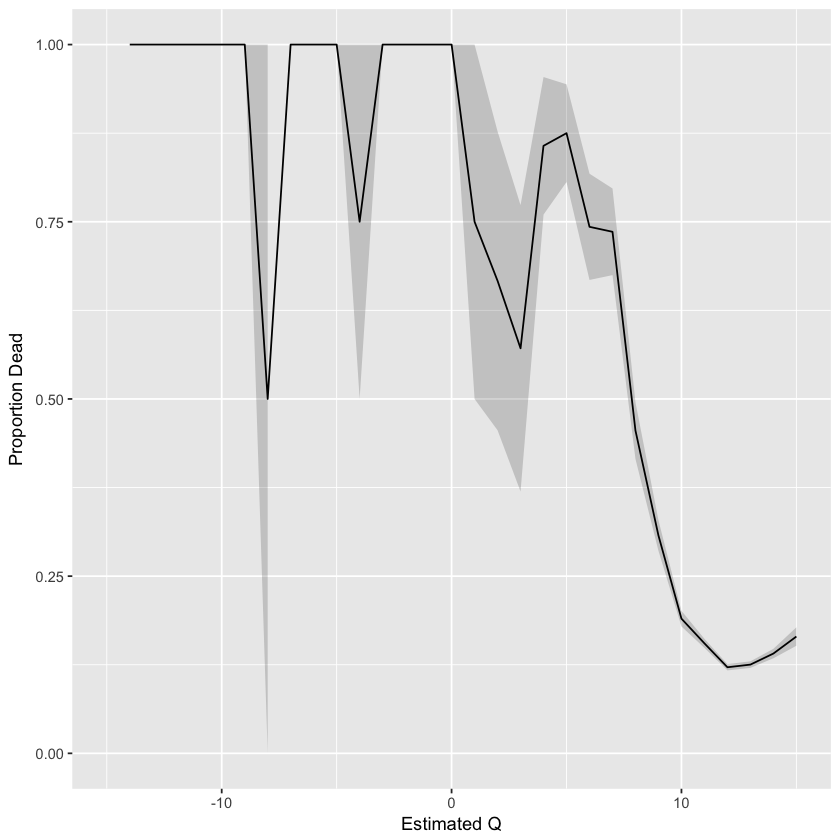

In [47]:
plot_df <- df %>% 
                mutate(bin_Q = floor(predicted_Q)) %>%
                group_by(bin_Q) %>%
                summarise(prop_dead = mean(hospital_expire_flag),
                          sd_dead = sd(hospital_expire_flag)/sqrt(n()))

ggplot(plot_df, aes(x = bin_Q,
                   y = prop_dead)) + 
    geom_ribbon(aes( 
                  ymin = prop_dead - sd_dead,
                  ymax = prop_dead + sd_dead), alpha = 0.2) +
    geom_line() +
    xlim(-15, 15) +
    xlab('Estimated Q') + 
    ylab('Proportion Dead')

`geom_smooth()` using method = 'gam'
Warning message:
“Removed 1067 rows containing non-finite values (stat_smooth).”

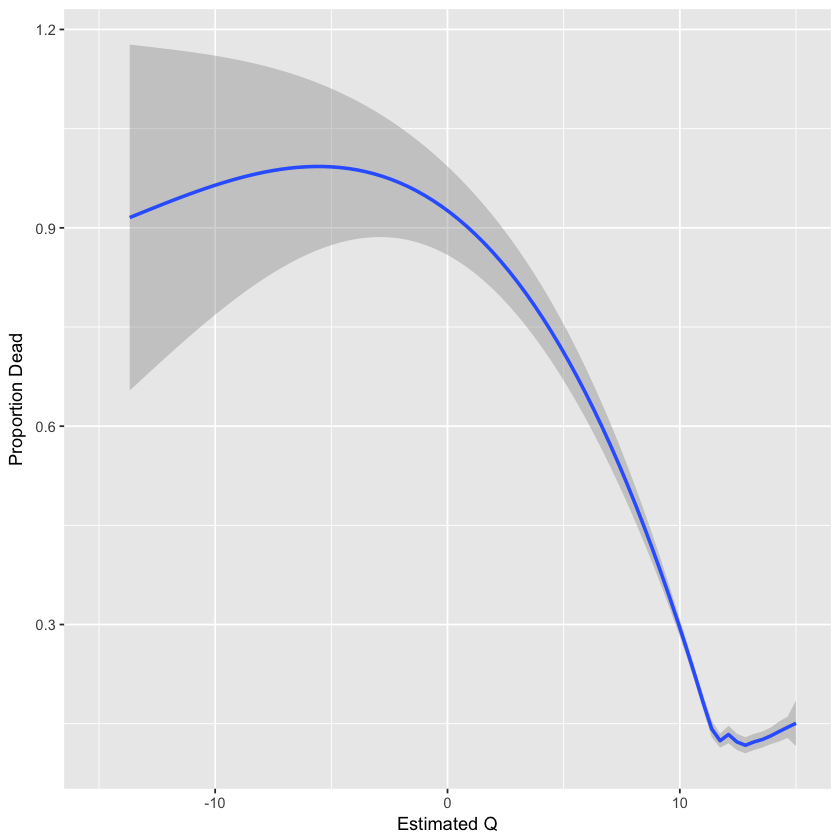

In [55]:
df %>% 
                ggplot(aes(predicted_Q,
                            hospital_expire_flag)) + 
                geom_smooth() +
                xlim(-15, 15) +
                xlab('Estimated Q') + 
                ylab('Proportion Dead')


In [ ]:
# num2quartile <- function(x) {
#     quants <- quantile(x, probs=0:4/4, na.rm = TRUE)
#     print(quants)
#     return(as.integer(cut(x, quants, include.lowest=TRUE)))
# }

In [22]:
# names(df)

[1] "X1"                     "subject_id"             "hadm_id"               
 [4] "icustay_id"             "interval_start_time"    "interval_end_time"     
 [7] "ALBUMIN"                "ANION GAP"              "BANDS"                 
[10] "BICARBONATE"            "BILIRUBIN"              "BUN"                   
[13] "CHLORIDE"               "CREATININE"             "DiasBP"                
[16] "Glucose"                "GLUCOSE"                "HeartRate"             
[19] "HEMATOCRIT"             "HEMOGLOBIN"             "INR"                   
[22] "LACTATE"                "MeanBP"                 "PaCO2"                 
[25] "PLATELET"               "POTASSIUM"              "PT"                    
[28] "PTT"                    "RespRate"               "SODIUM"                
[31] "SpO2"                   "SysBP"                  "TempC"                 
[34] "WBC"                    "age"                    "is_male"               
[37] "race_white"             "race_black"             "race_hispanic"         
[40] "race_other"             "height"                 "weight"                
[43] "vent"                   "sofa"                   "lods"                  
[46] "sirs"                   "qsofa"                  "qsofa_sysbp_score"     
[49] "qsofa_gcs_score"        "qsofa_resprate_score"   "elixhauser_hospital"   
[52] "blood_culture_positive" "discrete_action"        "hospital_expire_flag"  
[55] "reward"                 "row_id"                 "row_id_next"           
[58] "predicted_Q"

In [28]:
# x <- seq(-15, 15)
# print(x)
# b <- seq(-15, 15)
# print(b)
# x_bin <- .bincode(x, b, TRUE, TRUE)
# print(x_bin)
# bin_labels <- seq(-14.5, 14.5, 1)

# length(x)
# length(x_bin)
bin_labels

 [1] -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
[20]   4   5   6   7   8   9  10  11  12  13  14  15
 [1] -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
[20]   4   5   6   7   8   9  10  11  12  13  14  15
 [1]  1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30


[1] -14.5 -13.5 -12.5 -11.5 -10.5  -9.5  -8.5  -7.5  -6.5  -5.5  -4.5  -3.5
[13]  -2.5  -1.5  -0.5   0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5
[25]   9.5  10.5  11.5  12.5  13.5  14.5

In [30]:
# cut(x, breaks = seq(-15, 15))

[1] <NA>      (-15,-14] (-14,-13] (-13,-12] (-12,-11] (-11,-10] (-10,-9] 
 [8] (-9,-8]   (-8,-7]   (-7,-6]   (-6,-5]   (-5,-4]   (-4,-3]   (-3,-2]  
[15] (-2,-1]   (-1,0]    (0,1]     (1,2]     (2,3]     (3,4]     (4,5]    
[22] (5,6]     (6,7]     (7,8]     (8,9]     (9,10]    (10,11]   (11,12]  
[29] (12,13]   (13,14]   (14,15]  
30 Levels: (-15,-14] (-14,-13] (-13,-12] (-12,-11] (-11,-10] ... (14,15]

In [29]:
# bin_label_df <- data.frame(bin_id = b, bin_label = bin_labels)

ERROR: Error in data.frame(bin_id = b, bin_label = bin_labels): arguments imply differing number of rows: 31, 30


In [23]:
# df %>% mutate(bin_Q = .bincode(predicted_Q, b))

X1,subject_id,hadm_id,icustay_id,interval_start_time,interval_end_time,ALBUMIN,ANION GAP,BANDS,BICARBONATE,⋯,qsofa_resprate_score,elixhauser_hospital,blood_culture_positive,discrete_action,hospital_expire_flag,reward,row_id,row_id_next,predicted_Q,bin_Q
0,26,197661,244882,2126-05-09 00:05:00,2126-05-09 04:05:00,-0.05746277,-0.22557014,-0.2986458,0.04208446,⋯,0.3918894,-0.5160765,-0.6855025,1,0,0,0,1,10.457919,27
1,26,197661,244882,2126-05-09 04:05:00,2126-05-09 08:05:00,-0.05746277,-0.22557014,-0.2986458,0.25599368,⋯,0.3918894,-0.5160765,-0.6855025,1,0,0,1,2,9.800947,26
2,26,197661,244882,2126-05-09 08:05:00,2126-05-09 12:05:00,-0.05746277,-0.22557014,-0.2986458,0.25599368,⋯,0.3918894,-0.5160765,-0.6855025,1,0,0,2,3,10.277639,27
3,26,197661,244882,2126-05-10 00:05:00,2126-05-10 04:05:00,-0.05746277,-0.47381901,-0.2986458,0.68381212,⋯,0.3918894,-0.5160765,-0.6855025,0,0,0,3,4,11.533098,28
4,26,197661,244882,2126-05-10 16:05:00,2126-05-10 20:05:00,-0.05746277,0.27092759,-0.2986458,0.25599368,⋯,0.3918894,-0.5160765,-0.6855025,0,0,0,4,5,10.265026,27
5,26,197661,244882,2126-05-11 04:05:00,2126-05-11 08:05:00,-0.05746277,-0.47381901,-0.2986458,0.68381212,⋯,0.3918894,-0.5160765,-0.6855025,0,0,15,5,5,11.266731,28
6,149,154869,224026,2135-02-23 03:17:00,2135-02-23 07:17:00,-0.05746277,0.02267872,-0.2986458,0.68381212,⋯,0.3918894,-1.1252859,-0.6855025,0,0,0,6,7,13.046410,30
7,149,154869,224026,2135-02-24 03:17:00,2135-02-24 07:17:00,-0.05746277,-0.47381901,-0.2986458,1.53944900,⋯,0.3918894,-1.1252859,-0.6855025,0,0,0,7,8,12.829931,29
8,149,154869,224026,2135-02-25 07:17:00,2135-02-25 11:17:00,-0.05746277,-0.47381901,-0.2986458,1.11163056,⋯,0.3918894,-1.1252859,-0.6855025,0,0,15,8,8,13.331321,30
9,165,170252,247247,2170-10-03 07:20:00,2170-10-03 11:20:00,-0.05746277,-0.22557014,-0.2986458,0.89772134,⋯,0.3918894,0.7023422,-0.6855025,0,0,0,9,10,10.474727,27
